In [1]:
import pandas as pd
import numpy as np

In [2]:
game_df = pd.read_csv(r'C:\Users\chali\Downloads\Compressed\game-recommendation-system\datasets\games.csv')

In [3]:
game_df.head(10)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
6,1659180,TD Worlds,"Jan 9, 2022",0 - 20000,3,0,10.99,1,"TD Worlds is a dynamic, highly strategical gam...","['English', 'Russian', 'Danish']",...,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
7,1968760,Legend of Rome - The Wrath of Mars,"May 5, 2022",0 - 20000,2,0,9.99,0,When the Roman people honored a simple warrior...,"['English', 'German']",...,0,0,0,magnussoft,magnussoft,"Single-player,Steam Cloud",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
8,1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
9,320150,Deadlings: Rotten Edition,"Nov 11, 2014",50000 - 100000,0,0,3.99,0,Death is lonely. He has zero friends on his Fa...,"['English', 'Polish', 'French', 'Italian', 'Ge...",...,0,782,0,ONE MORE LEVEL,ONE MORE L

In [4]:
pd.set_option('display.max_colwidth', 100)

In [5]:
game_df.columns.tolist()

['AppID',
 'Name',
 'Release date',
 'Estimated owners',
 'Peak CCU',
 'Required age',
 'Price',
 'DLC count',
 'About the game',
 'Supported languages',
 'Full audio languages',
 'Reviews',
 'Header image',
 'Website',
 'Support url',
 'Support email',
 'Windows',
 'Mac',
 'Linux',
 'Metacritic score',
 'Metacritic url',
 'User score',
 'Positive',
 'Negative',
 'Score rank',
 'Achievements',
 'Recommendations',
 'Notes',
 'Average playtime forever',
 'Average playtime two weeks',
 'Median playtime forever',
 'Median playtime two weeks',
 'Developers',
 'Publishers',
 'Categories',
 'Genres',
 'Tags',
 'Screenshots',
 'Movies']

In [6]:
game_df.shape

(71716, 39)

In [7]:
game_df.duplicated().sum()

np.int64(0)

In [8]:
game_df.drop_duplicates(inplace=True)

In [9]:
print("Number of unique games in the dataset : ",game_df['Name'].unique().shape)

Number of unique games in the dataset :  (71171,)


In [10]:
null_columns = game_df.isna().sum()
null_columns = null_columns[null_columns > 0]
print("Columns with null values:\n", null_columns)


Columns with null values:
 Name                  1
About the game     2436
Reviews           62549
Website           36643
Support url       35466
Support email     11120
Metacritic url    67938
Score rank        71674
Notes             61274
Developers         2461
Publishers         2720
Categories         3407
Genres             2439
Tags              14014
Screenshots        1329
Movies             5048
dtype: int64


In [11]:
game_df = game_df.drop(columns=[
    'Tags', 'Notes', 'Score rank', 'Metacritic url', 'Support url', 'Support email',
    'Website', 'Reviews', 'Peak CCU', 'DLC count', 'Full audio languages', 'Linux',
    'Metacritic score', 'User score', 'Positive', 'Negative', 'Achievements','Required age',
    'Recommendations', 'Average playtime forever', 'Average playtime two weeks',
    'Median playtime forever', 'Median playtime two weeks'
])


In [12]:
game_df.columns.tolist()

['AppID',
 'Name',
 'Release date',
 'Estimated owners',
 'Price',
 'About the game',
 'Supported languages',
 'Header image',
 'Windows',
 'Mac',
 'Developers',
 'Publishers',
 'Categories',
 'Genres',
 'Screenshots',
 'Movies']

In [13]:
game_df.shape

(71716, 16)

In [14]:
game_df['About the game'].dropna(inplace=True)
game_df['Developers'].dropna(inplace=True)
game_df['Publishers'].dropna(inplace=True)
game_df['Categories'].dropna(inplace=True)
game_df['Genres'].dropna(inplace=True)
game_df['Screenshots'].dropna(inplace=True)
game_df['Movies'].dropna(inplace=True)


In [15]:
game_df.isna().sum()

AppID                     0
Name                      1
Release date              0
Estimated owners          0
Price                     0
About the game         2436
Supported languages       0
Header image              0
Windows                   0
Mac                       0
Developers             2461
Publishers             2720
Categories             3407
Genres                 2439
Screenshots            1329
Movies                 5048
dtype: int64

In [16]:
game_df.dropna(inplace=True)

In [17]:
game_df.isna().sum()

AppID                  0
Name                   0
Release date           0
Estimated owners       0
Price                  0
About the game         0
Supported languages    0
Header image           0
Windows                0
Mac                    0
Developers             0
Publishers             0
Categories             0
Genres                 0
Screenshots            0
Movies                 0
dtype: int64

In [18]:
game_df.shape

(65206, 16)

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


game_df.head(1)

,AppID,Name,Release date,Estimated owners,Price,About the game,Supported languages,Header image,Windows,Mac,Developers,Publishers,Categories,Genres,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,19.99,Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Player...,['English'],https://cdn.akamai.steamstatic.com/steam/apps/20200/header.jpg?t=1640121033,True,False,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,Partial Controller Support","Casual,Indie,Sports","https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005994.1920x1080.jpg?t=1640121033,https:...",http://cdn.akamai.steamstatic.com/steam/apps/256863704/movie_max.mp4?t=1638854607


In [20]:
game_df['About the game'].iloc[23]

"PowersVR lets you be the caped crusader from comic books. Featuring a cast of colorful heroes, you'll get to test out their unique superpowers in Metropolis. Compete in challenges, unlock all superpowers, fight enemies and discover hidden collectibles. With more heroes and challenges yet to come! Metropolis City is a giant VR sandbox, filled with interesting locations and enemies to face. Follow the beams of light to discover new heroes with all new abilities, some beams will lead you to a challenge. Have the right hero? A section of the map becomes an isolated activity in which you compete for a high score! Secret collectibles are scattered in every nook and cranny, gathering them will unlock all sorts of artwork in the Gallery."

In [21]:
g= game_df['Genres'].unique().tolist()
len(g)

1967

In [22]:
g

['Casual,Indie,Sports',
 'Action,Indie',
 'Action,Adventure,Indie,Strategy',
 'Adventure,Casual,Indie',
 'Adventure,Indie',
 'Adventure,Casual,Free to Play,Massively Multiplayer,RPG,Strategy',
 'Indie,Strategy',
 'Casual',
 'Adventure,RPG,Simulation,Strategy',
 'Action,Adventure,Indie',
 'Indie,RPG',
 'Strategy',
 'Casual,Indie',
 'Action,Adventure,Indie,RPG,Strategy,Early Access',
 'Action,Casual,Simulation,Sports',
 'Adventure,Casual,Indie,RPG',
 'Action,Adventure,Casual,Indie,Early Access',
 'Action,Adventure,Casual,Indie',
 'Action,Indie,Racing,Simulation',
 'Massively Multiplayer,Racing,Simulation,Sports',
 'Action,Indie,Simulation',
 'Casual,Indie,Simulation,Strategy',
 'Adventure,Casual,Indie,RPG,Simulation',
 'Adventure,Indie,RPG',
 'Action,Strategy,Early Access',
 'Action,Casual,Indie',
 'Action,Indie,Early Access',
 'Action,Adventure',
 'Indie',
 'Casual,Free to Play,Indie,Massively Multiplayer,RPG,Simulation',
 'Adventure,Casual,Indie,Simulation,Strategy',
 'Action,RPG',
 'A

In [23]:
game_df['Genres'].isna().sum()

np.int64(0)

In [24]:
genres_split = game_df['Genres'].str.split(',')


all_genres = [genre.strip() for sublist in genres_split for genre in sublist]


unique_genres = sorted(set(all_genres))
print(unique_genres)
len(unique_genres)

['360 Video', 'Accounting', 'Action', 'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Episodic', 'Free to Play', 'Game Development', 'Gore', 'Indie', 'Massively Multiplayer', 'Movie', 'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content', 'Short', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Tutorial', 'Utilities', 'Video Production', 'Violent', 'Web Publishing']


33

In [25]:
from collections import Counter

genre_counts = Counter(all_genres)
genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))
print(genre_counts)


{'Indie': 47247, 'Action': 27703, 'Casual': 27631, 'Adventure': 25658, 'Simulation': 12999, 'Strategy': 12537, 'RPG': 11464, 'Early Access': 7978, 'Free to Play': 5406, 'Sports': 3074, 'Racing': 2430, 'Massively Multiplayer': 1697, 'Violent': 485, 'Gore': 295, 'Utilities': 240, 'Design & Illustration': 140, 'Animation & Modeling': 117, 'Nudity': 110, 'Sexual Content': 99, 'Education': 92, 'Video Production': 68, 'Game Development': 59, 'Audio Production': 55, 'Software Training': 46, 'Web Publishing': 33, 'Photo Editing': 26, 'Accounting': 5, 'Movie': 2, 'Documentary': 1, 'Episodic': 1, 'Short': 1, 'Tutorial': 1, '360 Video': 1}


In [26]:
game_df

,AppID,Name,Release date,Estimated owners,Price,About the game,Supported languages,Header image,Windows,Mac,Developers,Publishers,Categories,Genres,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,19.99,Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Player...,['English'],https://cdn.akamai.steamstatic.com/steam/apps/20200/header.jpg?t=1640121033,True,False,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,Partial Controller Support","Casual,Indie,Sports","https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005994.1920x1080.jpg?t=1640121033,https:...",http://cdn.akamai.steamstatic.com/steam/apps/256863704/movie_max.mp4?t=1638854607
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0.99,"THE LAW!! Looks to be a showdown atop a train. This will be your last fight. Good luck, Train Ba...","['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Portuguese - Brazil',...",https://cdn.akamai.steamstatic.com/steam/apps/655370/header.jpg?t=1617500526,True,True,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controller support,Steam Leaderboards,Remote Play on Phone...","Action,Indie",https://cdn.akamai.steamstatic.com/steam/apps/655370/ss_16785eac54b29db688870e832f6997c89cd7804b...,http://cdn.akamai.steamstatic.com/steam/apps/256691108/movie_max.mp4?t=1506089586
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,4.99,"Jolt Project: The army now has a new robotics project, jolt. It's up to you to control it and en...","['English', 'Portuguese - Brazil']",https://cdn.akamai.steamstatic.com/steam/apps/1732930/header.jpg?t=1637149386,True,False,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",https://cdn.akamai.steamstatic.com/steam/apps/1732930/ss_09d67dec0607be7c4ead80289763033a47c86d8...,"http://cdn.akamai.steamstatic.com/steam/apps/256847488/movie_max.mp4?t=1635980739,http://cdn.aka..."
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,5.99,HENOSIS™ is a mysterious 2D Platform Puzzler where players are propelled into weird and visceral...,"['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Korean', 'Portuguese'...",https://cdn.akamai.steamstatic.com/steam/apps/1355720/header.jpg?t=1639875115,True,True,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie",https://cdn.akamai.steamstatic.com/steam/apps/1355720/ss_20bbae2d9d5aaa2f043f372a551faabc0c47b0b...,http://cdn.akamai.steamstatic.com/steam/apps/256819153/movie_max.mp4?t=1611314333
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0.00,ABOUT THE GAME Play as a hacker who has arranged a deal with a gangster. That’s how the protagon...,"['English', 'Spanish - Spain']",https://cdn.akamai.steamstatic.com/steam/apps/1139950/header.jpg?t=1595003825,True,True,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie",https://cdn.akamai.steamstatic.com/steam/apps/1139950/ss_cb94604e43f910a3b994f120412bdc5a576222a...,http://cdn.akamai.steamstatic.com/steam/apps/256764430/movie_max.mp4?t=1580660973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,2159120,SUR5,"Apr 1, 2023",0 - 0,0.00,"Innovative Gameplay SUR5 brings a brand new, fun experience that is easy to understand, but has ...","['English', 'Polish', 'Spanish - Latin America']",https://cdn.akamai.steamstatic.com/steam/apps/2159120/header.jpg?t=1680362161,True,False,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Steam Achievements,In-App Purchases","Free to Play,Indie,Massively Multiplayer,Strategy,Early Access",https://cdn.akamai.steamstatic.com/steam/apps/2159120/ss_f543d50c34d556d854f5ce0f2fc6c18d5f0e29f...,http://cdn.akamai.steamstatic.com/steam/apps/256917525/movie_max.mp4?t=1669321904
71712,2125160,Prison Life 2,"Mar 30, 2023",0 - 20000,10.79,Core Features Real players only! All Guards and Prisoners are human players. 3 Maps - Bricksfiel...

In [27]:

genre_to_category = {
    'Nudity': 'Adult', 'Sexual Content': 'Adult', 'Violent': 'Adult', 'Gore': 'Adult',
    'Utilities': 'Software', 'Design & Illustration': 'Software', 'Animation & Modeling': 'Software',
    'Video Production': 'Software', 'Game Development': 'Software', 'Audio Production': 'Software',
    'Software Training': 'Software', 'Web Publishing': 'Software', 'Photo Editing': 'Software',
    'Accounting': 'Software', 'Movie': 'Media', 'Documentary': 'Media', 'Episodic': 'Media',
    'Short': 'Media', 'Tutorial': 'Media', '360 Video': 'Media', 'Education': 'Education'
}

game_genres = [
    'Indie', 'Action', 'Casual', 'Adventure', 'Simulation',
    'Strategy', 'RPG', 'Early Access', 'Free to Play',
    'Sports', 'Racing', 'Massively Multiplayer'
]


def map_genres(genre_str):
    if pd.isna(genre_str):
        return genre_str
    genres = [g.strip() for g in genre_str.split(',')]
    mapped = []

    for g in genres:
        if g in game_genres:
            mapped.append(g)
        elif g in genre_to_category:
            mapped.append(genre_to_category[g])
        else:
            mapped.append(g)
    return ','.join(sorted(set(mapped)))


game_df['Genres'] = game_df['Genres'].apply(map_genres)


In [28]:
game_df.head()

,AppID,Name,Release date,Estimated owners,Price,About the game,Supported languages,Header image,Windows,Mac,Developers,Publishers,Categories,Genres,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,19.99,Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Player...,['English'],https://cdn.akamai.steamstatic.com/steam/apps/20200/header.jpg?t=1640121033,True,False,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,Partial Controller Support","Casual,Indie,Sports","https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005994.1920x1080.jpg?t=1640121033,https:...",http://cdn.akamai.steamstatic.com/steam/apps/256863704/movie_max.mp4?t=1638854607
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0.99,"THE LAW!! Looks to be a showdown atop a train. This will be your last fight. Good luck, Train Ba...","['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Portuguese - Brazil',...",https://cdn.akamai.steamstatic.com/steam/apps/655370/header.jpg?t=1617500526,True,True,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controller support,Steam Leaderboards,Remote Play on Phone...","Action,Indie",https://cdn.akamai.steamstatic.com/steam/apps/655370/ss_16785eac54b29db688870e832f6997c89cd7804b...,http://cdn.akamai.steamstatic.com/steam/apps/256691108/movie_max.mp4?t=1506089586
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,4.99,"Jolt Project: The army now has a new robotics project, jolt. It's up to you to control it and en...","['English', 'Portuguese - Brazil']",https://cdn.akamai.steamstatic.com/steam/apps/1732930/header.jpg?t=1637149386,True,False,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",https://cdn.akamai.steamstatic.com/steam/apps/1732930/ss_09d67dec0607be7c4ead80289763033a47c86d8...,"http://cdn.akamai.steamstatic.com/steam/apps/256847488/movie_max.mp4?t=1635980739,http://cdn.aka..."
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,5.99,HENOSIS™ is a mysterious 2D Platform Puzzler where players are propelled into weird and visceral...,"['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Korean', 'Portuguese'...",https://cdn.akamai.steamstatic.com/steam/apps/1355720/header.jpg?t=1639875115,True,True,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie",https://cdn.akamai.steamstatic.com/steam/apps/1355720/ss_20bbae2d9d5aaa2f043f372a551faabc0c47b0b...,http://cdn.akamai.steamstatic.com/steam/apps/256819153/movie_max.mp4?t=1611314333
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0.00,ABOUT THE GAME Play as a hacker who has arranged a deal with a gangster. That’s how the protagon...,"['English', 'Spanish - Spain']",https://cdn.akamai.steamstatic.com/steam/apps/1139950/header.jpg?t=1595003825,True,True,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie",https://cdn.akamai.steamstatic.com/steam/apps/1139950/ss_cb94604e43f910a3b994f120412bdc5a576222a...,http://cdn.akamai.steamstatic.com/steam/apps/256764430/movie_max.mp4?t=1580660973


In [29]:
genres_split = game_df['Genres'].str.split(',')


all_genres = [genre.strip() for sublist in genres_split for genre in sublist]


unique_genres = sorted(set(all_genres))
print(unique_genres)
len(unique_genres)

['Action', 'Adult', 'Adventure', 'Casual', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Media', 'RPG', 'Racing', 'Simulation', 'Software', 'Sports', 'Strategy']


16

In [30]:
game_df['Released_date'] = pd.to_datetime(game_df['Release date'], errors='coerce')

In [31]:
game_df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Price',
       'About the game', 'Supported languages', 'Header image', 'Windows',
       'Mac', 'Developers', 'Publishers', 'Categories', 'Genres',
       'Screenshots', 'Movies', 'Released_date'],
      dtype='object')

In [32]:
game_df['Released_date']

0       2008-10-21
1       2017-10-12
2       2021-11-17
3       2020-07-23
4       2020-02-03
           ...    
71711   2023-04-01
71712   2023-03-30
71713   2023-03-27
71714   2023-04-02
71715   2023-03-30
Name: Released_date, Length: 65206, dtype: datetime64[ns]

In [33]:
game_df['Release_year'] = game_df['Released_date'].dt.year.astype('Int64')
game_df['Release_month'] = game_df['Released_date'].dt.month.astype('Int64')
game_df['Release_day'] = game_df['Released_date'].dt.day.astype('Int64')

In [34]:
game_df.head()

,AppID,Name,Release date,Estimated owners,Price,About the game,Supported languages,Header image,Windows,Mac,Developers,Publishers,Categories,Genres,Screenshots,Movies,Released_date,Release_year,Release_month,Release_day
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,19.99,Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Player...,['English'],https://cdn.akamai.steamstatic.com/steam/apps/20200/header.jpg?t=1640121033,True,False,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,Partial Controller Support","Casual,Indie,Sports","https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005994.1920x1080.jpg?t=1640121033,https:...",http://cdn.akamai.steamstatic.com/steam/apps/256863704/movie_max.mp4?t=1638854607,2008-10-21,2008,10,21
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0.99,"THE LAW!! Looks to be a showdown atop a train. This will be your last fight. Good luck, Train Ba...","['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Portuguese - Brazil',...",https://cdn.akamai.steamstatic.com/steam/apps/655370/header.jpg?t=1617500526,True,True,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controller support,Steam Leaderboards,Remote Play on Phone...","Action,Indie",https://cdn.akamai.steamstatic.com/steam/apps/655370/ss_16785eac54b29db688870e832f6997c89cd7804b...,http://cdn.akamai.steamstatic.com/steam/apps/256691108/movie_max.mp4?t=1506089586,2017-10-12,2017,10,12
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,4.99,"Jolt Project: The army now has a new robotics project, jolt. It's up to you to control it and en...","['English', 'Portuguese - Brazil']",https://cdn.akamai.steamstatic.com/steam/apps/1732930/header.jpg?t=1637149386,True,False,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",https://cdn.akamai.steamstatic.com/steam/apps/1732930/ss_09d67dec0607be7c4ead80289763033a47c86d8...,"http://cdn.akamai.steamstatic.com/steam/apps/256847488/movie_max.mp4?t=1635980739,http://cdn.aka...",2021-11-17,2021,11,17
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,5.99,HENOSIS™ is a mysterious 2D Platform Puzzler where players are propelled into weird and visceral...,"['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Korean', 'Portuguese'...",https://cdn.akamai.steamstatic.com/steam/apps/1355720/header.jpg?t=1639875115,True,True,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie",https://cdn.akamai.steamstatic.com/steam/apps/1355720/ss_20bbae2d9d5aaa2f043f372a551faabc0c47b0b...,http://cdn.akamai.steamstatic.com/steam/apps/256819153/movie_max.mp4?t=1611314333,2020-07-23,2020,7,23
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0.00,ABOUT THE GAME Play as a hacker who has arranged a deal with a gangster. That’s how the protagon...,"['English', 'Spanish - Spain']",https://cdn.akamai.steamstatic.com/steam/apps/1139950/header.jpg?t=1595003825,True,True,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie",https://cdn.akamai.steamstatic.com/steam/apps/1139950/ss_cb94604e43f910a3b994f120412bdc5a576222a...,http://cdn.akamai.steamstatic.com/steam/apps/256764430/movie_max.mp4?t=1580660973,2020-02-03,2020,2,3


In [35]:
game_df.drop(columns=['Release date'], inplace=True)

In [36]:

same_data = game_df['Developers'] == game_df['Publishers']
print(same_data.head())
matching_count = same_data.sum()
print(f"Number of rows where 'Developers' and 'Publishers' are the same: {matching_count}")


0     True
1    False
2     True
3     True
4     True
dtype: bool
Number of rows where 'Developers' and 'Publishers' are the same: 44973


In [37]:
game_df['word_count'] = game_df['About the game'].apply(lambda x: len(str(x).split()))

In [38]:
game_df['word_count'].max()

np.int64(4355)

In [39]:
game_df['word_count'].mean()

np.float64(207.94261264300832)

In [40]:
game_df = game_df[game_df['word_count'] > 50]

In [41]:
game_df['word_count']

0        158
1         87
2        111
3         92
4        115
        ... 
71711    130
71712    337
71713    265
71714    363
71715     87
Name: word_count, Length: 62204, dtype: int64

In [42]:
import re
def is_english(text):
    if pd.isnull(text):
        return False

    return bool(re.match(r'^[\x00-\x7F]+$', text))
game_df = game_df[game_df['About the game'].apply(is_english)]

In [43]:
min_count = game_df['word_count'].min()
min_word_count_data = game_df[game_df['word_count'] == min_count]
pd.set_option('display.max_colwidth', None)
print(min_word_count_data[['About the game']].head(3))



                                                                                                                                                                                                                                                                                                                           About the game
193  You decided to explore the area outside the city to find a suitable place for a birthday picnic with your friends. Suddenly you discover a forsaken house. And here your adventure starts. Key features: maximum simulation of real-life conditions screamers atmosphere only few hints hardcore you will die very often checkpoints
600                                                     Chaos Starter is a fight simulator with realistic physics. You are going to find yourself in different life situations, and every time you will have to start a Chaos. No matter where are you and what you are doing, your only task is to spoil the event and initiate a brawl.
812       

In [44]:
game_df.shape

(38158, 20)

creating require age column

In [45]:
def get_required_age(genres):

    if 'Adult' in genres:
        return 18
    else:
        return 0

game_df['Required_age'] = game_df['Genres'].apply(lambda x: get_required_age(x.split(',')))
print(game_df[['Genres', 'Required_age']].head())


                                                             Genres  \
0                                               Casual,Indie,Sports   
1                                                      Action,Indie   
2                                   Action,Adventure,Indie,Strategy   
5  Adventure,Casual,Free to Play,Massively Multiplayer,RPG,Strategy   
6                                                    Indie,Strategy   

   Required_age  
0             0  
1             0  
2             0  
5             0  
6             0  


In [46]:
game_df['Required_age'].value_counts()

Required_age
0     37796
18      362
Name: count, dtype: int64

In [47]:
game_df['tagged_description']= game_df[['AppID','About the game']].astype(str).agg(" ".join, axis=1)

In [48]:
game_df['tagged_description']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

# Quick EDA

distribution plot

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38158 entries, 0 to 71715
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AppID                38158 non-null  int64         
 1   Name                 38158 non-null  object        
 2   Estimated owners     38158 non-null  object        
 3   Price                38158 non-null  float64       
 4   About the game       38158 non-null  object        
 5   Supported languages  38158 non-null  object        
 6   Header image         38158 non-null  object        
 7   Windows              38158 non-null  bool          
 8   Mac                  38158 non-null  bool          
 9   Developers           38158 non-null  object        
 10  Publishers           38158 non-null  object        
 11  Categories           38158 non-null  object        
 12  Genres               38158 non-null  object        
 13  Screenshots          38158 non-null 

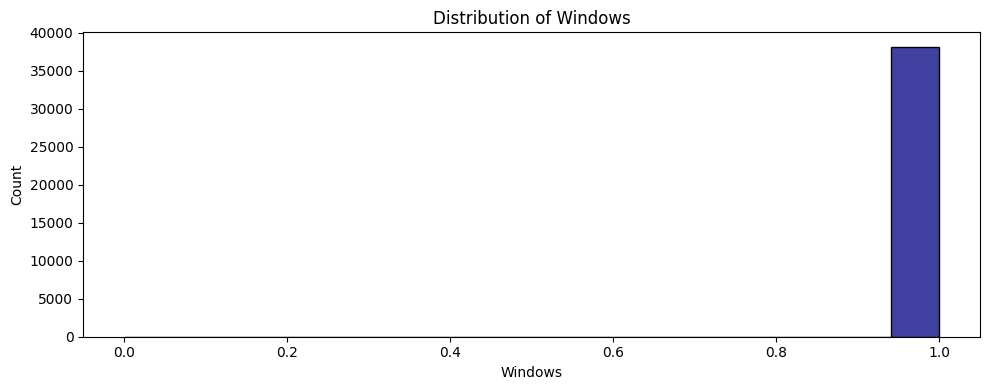

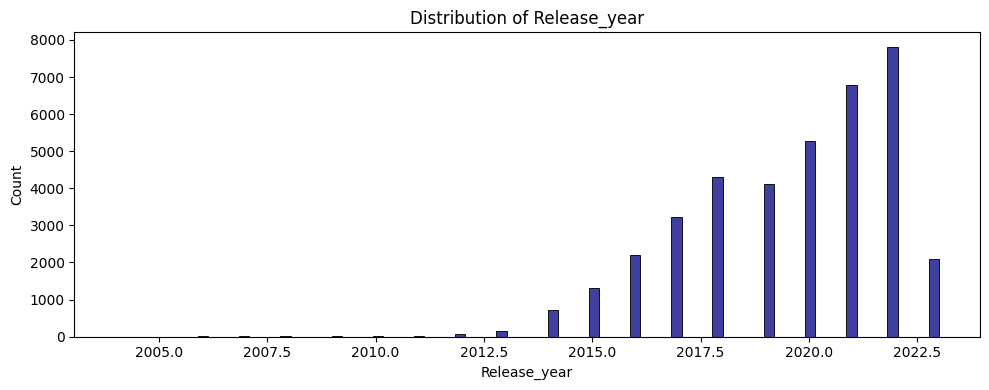

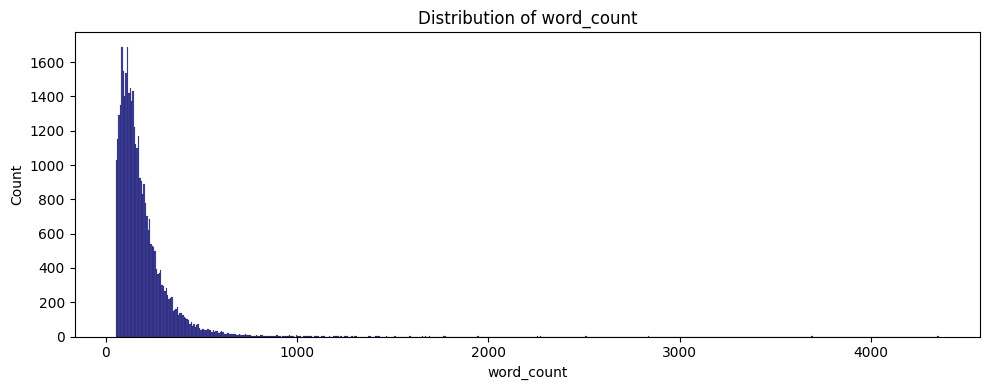

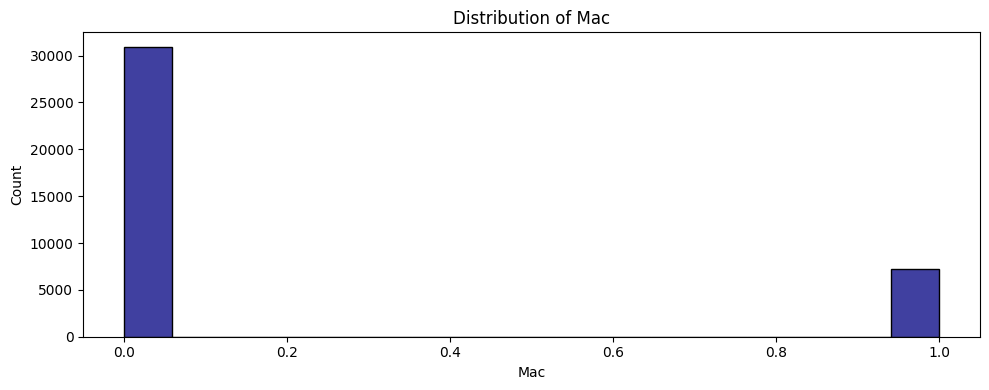

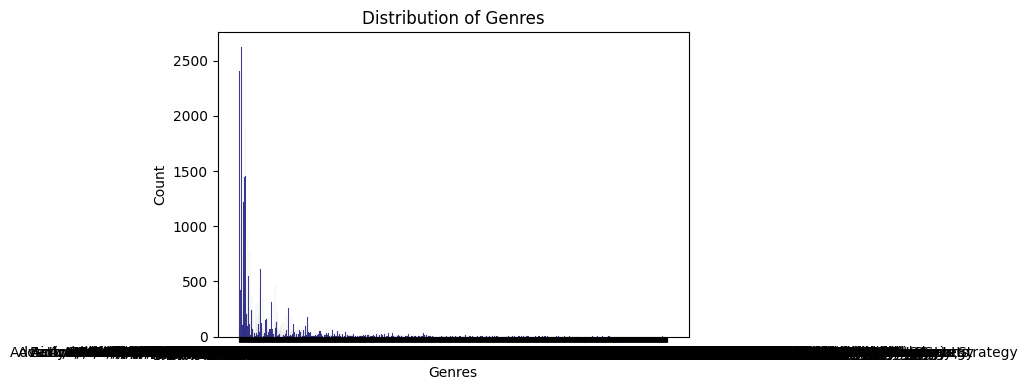

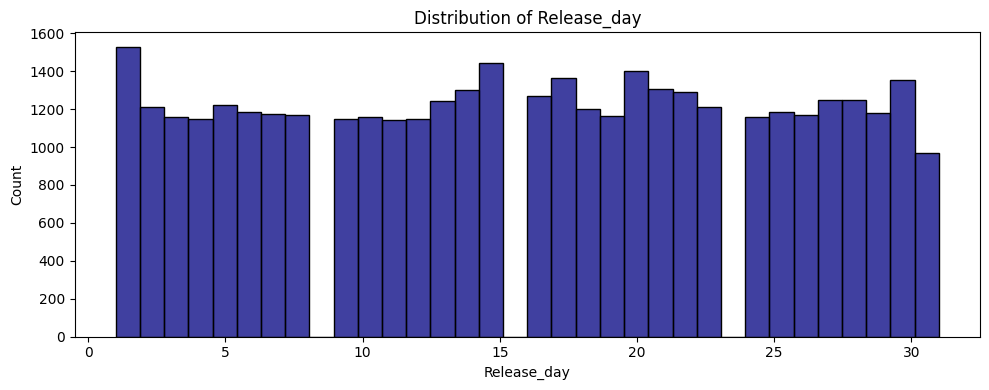

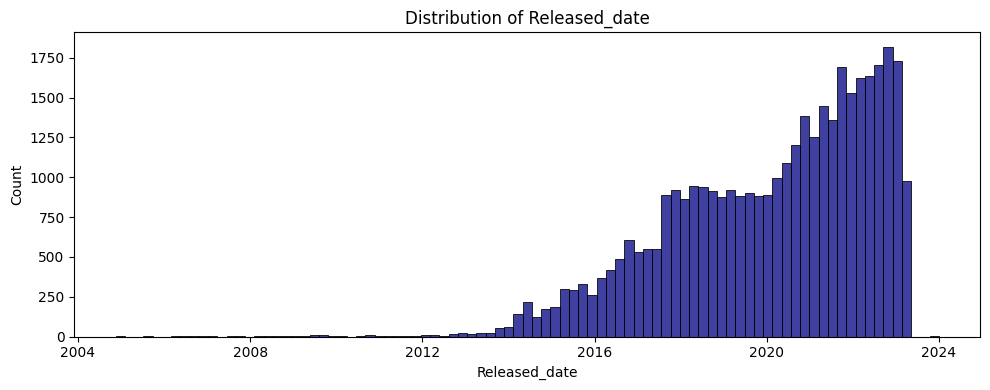

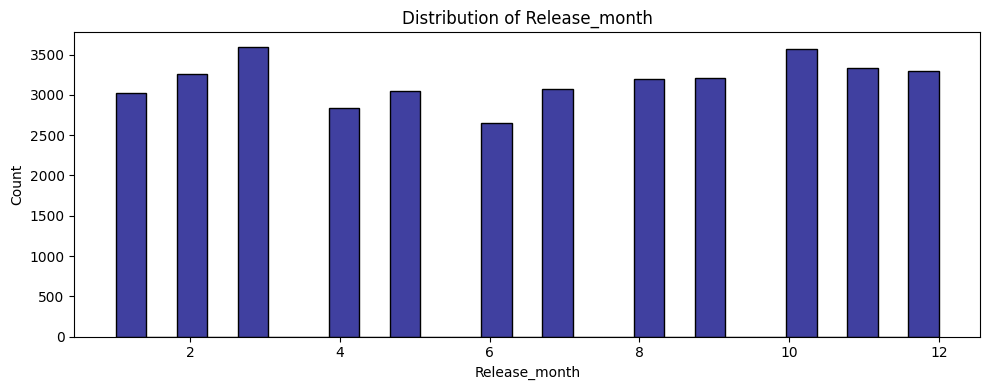

In [51]:
cols = {'Windows', 'Mac', 'Genres', 'Released_date', 'Release_year', 'Release_month', 'Release_day', 'word_count'}

for col in cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(game_df[col], color='navy')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


In [52]:
game_df.columns

Index(['AppID', 'Name', 'Estimated owners', 'Price', 'About the game',
       'Supported languages', 'Header image', 'Windows', 'Mac', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Screenshots', 'Movies',
       'Released_date', 'Release_year', 'Release_month', 'Release_day',
       'word_count', 'Required_age', 'tagged_description'],
      dtype='object')

In [ ]:
game_df.isna().sum()

In [53]:
game_df.head(3)

,AppID,Name,Estimated owners,Price,About the game,Supported languages,Header image,Windows,Mac,Developers,Publishers,Categories,Genres,Screenshots,Movies,Released_date,Release_year,Release_month,Release_day,word_count,Required_age,tagged_description
0,20200,Galactic Bowling,0 - 20000,19.99,"Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Players will engage in fast-paced single and multi-player competition while being submerged in a unique new universe filled with over-the-top humor, wild characters, unique levels, and addictive game play. The title is aimed at players of all ages and skill sets. Through accessible and intuitive controls and game-play, Galactic Bowling allows you to jump right into the action. A single-player campaign and online play allow you to work your way up the ranks of the Galactic Bowling League! Whether you have hours to play or only a few minutes, Galactic Bowling is a fast paced and entertaining experience that will leave you wanting more! Full Single-player story campaign including 11 Characters and Environments. 2 Single-player play modes including Regular and Battle Modes. Head to Head Online Multiplayer play Modes. Super Powers, Special Balls, and Whammies. Unlockable Characters, Environments, and Minigames. Unlock all 30 Steam Achievements!",['English'],https://cdn.akamai.steamstatic.com/steam/apps/20200/header.jpg?t=1640121033,True,False,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,Partial Controller Support","Casual,Indie,Sports","https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005994.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005993.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005992.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000006011.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005685.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005686.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005995.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005688.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005689.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005690.1920x1080.jpg?t=1640121033",http://cdn.akamai.steamstatic.com/steam/apps/256863704/movie_max.mp4?t=1638854607,2008-10-21,2008,10,21,158,0,"20200 Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Players will engage in fast-paced single and multi-player competition while being submerged in a unique new universe filled with over-the-top humor, wild characters, unique levels, and addictive game play. The title is aimed at players of all ages and skill sets. Through accessible and intuitive controls and game-play, Galactic Bowling allows you to jump right into the action. A single-player campaign and online play allow you to work your way up the ranks of the Galactic Bowling League! Whether you have hours to play or only a few minutes, Galactic Bowling is a fast paced and entertaining experience that will leave you wanting more! Full Single-player story campaign including 11 Characters and Environments. 2 Single-player play modes including Regular and Battle Modes. Head to Head Online Multiplayer play Modes. Super Powers, Special Balls, and Whammies. Unlockable Characters, Environments, and Minigames. Unlock all 30 Steam Achievements!"
1,655370,Train Bandit,0 - 20000,0.99,"THE LAW!! Looks to be a showdown atop a train. This will be your last fight. Good luck, Train Bandit. WHAT IS THIS GAME? Train Bandit is a simple score attack game. The Law will attack you from both sides. Your weapon is your keyboard. You'll use those keys to kick the living shit out of the law. React quickly by attack

In [54]:
game_df.to_csv(r'C:\Users\chali\Downloads\Compressed\game-recommendation-system\datasets\cleaned_game.csv', index=False)

#sentiment Analysis

In [55]:
from transformers import pipeline
classifier = pipeline("text-classification",
                      model="j-hartmann/emotion-english-distilroberta-base",
                      top_k= None,
)
classifier("I love this!")


c:\Users\chali\Downloads\Compressed\game-recommendation-system\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.008528691716492176},
  {'label': 'neutral', 'score': 0.005764589179307222},
  {'label': 'anger', 'score': 0.004419791977852583},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'disgust', 'score': 0.001611992483958602},
  {'label': 'fear', 'score': 0.0004138525982853025}]]

In [56]:
game_df['About the game'][0]

'Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Players will engage in fast-paced single and multi-player competition while being submerged in a unique new universe filled with over-the-top humor, wild characters, unique levels, and addictive game play. The title is aimed at players of all ages and skill sets. Through accessible and intuitive controls and game-play, Galactic Bowling allows you to jump right into the action. A single-player campaign and online play allow you to work your way up the ranks of the Galactic Bowling League! Whether you have hours to play or only a few minutes, Galactic Bowling is a fast paced and entertaining experience that will leave you wanting more! Full Single-player story campaign including 11 Characters and Environments. 2 Single-player play modes including Regular and Battle Modes. Head to Head Online Multiplayer play Modes. Super Powers, Special Balls, and Whammies. Unlockable Characters, Environments, and 

In [57]:
classifier(game_df['About the game'][0])

[[{'label': 'joy', 'score': 0.5901387333869934},
  {'label': 'neutral', 'score': 0.34395185112953186},
  {'label': 'surprise', 'score': 0.04111314192414284},
  {'label': 'anger', 'score': 0.010401741601526737},
  {'label': 'disgust', 'score': 0.0071746413595974445},
  {'label': 'sadness', 'score': 0.0053082425147295},
  {'label': 'fear', 'score': 0.0019117237534373999}]]

In [58]:
classifier(game_df['About the game'][0].split("."))

[[{'label': 'neutral', 'score': 0.7835095524787903},
  {'label': 'joy', 'score': 0.11311990767717361},
  {'label': 'surprise', 'score': 0.06659195572137833},
  {'label': 'disgust', 'score': 0.017894748598337173},
  {'label': 'anger', 'score': 0.009464818052947521},
  {'label': 'sadness', 'score': 0.005986671894788742},
  {'label': 'fear', 'score': 0.0034323264844715595}],
 [{'label': 'joy', 'score': 0.6992320418357849},
  {'label': 'neutral', 'score': 0.27037718892097473},
  {'label': 'surprise', 'score': 0.013399029150605202},
  {'label': 'disgust', 'score': 0.005957326851785183},
  {'label': 'anger', 'score': 0.005703591741621494},
  {'label': 'sadness', 'score': 0.004110425710678101},
  {'label': 'fear', 'score': 0.0012203279184177518}],
 [{'label': 'neutral', 'score': 0.8317542672157288},
  {'label': 'joy', 'score': 0.11815626919269562},
  {'label': 'surprise', 'score': 0.027941452339291573},
  {'label': 'sadness', 'score': 0.008040274493396282},
  {'label': 'anger', 'score': 0.006

In [59]:
sentences = game_df['About the game'][0].split(".")
predictions = classifier(sentences)

In [60]:
sentences[0]

'Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist'

In [61]:
predictions[0]

[{'label': 'neutral', 'score': 0.7835095524787903},
 {'label': 'joy', 'score': 0.11311990767717361},
 {'label': 'surprise', 'score': 0.06659195572137833},
 {'label': 'disgust', 'score': 0.017894748598337173},
 {'label': 'anger', 'score': 0.009464818052947521},
 {'label': 'sadness', 'score': 0.005986671894788742},
 {'label': 'fear', 'score': 0.0034323264844715595}]

In [62]:
sentences[2]

' The title is aimed at players of all ages and skill sets'

In [63]:
predictions[2]

[{'label': 'neutral', 'score': 0.8317542672157288},
 {'label': 'joy', 'score': 0.11815626919269562},
 {'label': 'surprise', 'score': 0.027941452339291573},
 {'label': 'sadness', 'score': 0.008040274493396282},
 {'label': 'anger', 'score': 0.006270876154303551},
 {'label': 'disgust', 'score': 0.003929574973881245},
 {'label': 'fear', 'score': 0.003907159902155399}]

In [64]:
predictions

[[{'label': 'neutral', 'score': 0.7835095524787903},
  {'label': 'joy', 'score': 0.11311990767717361},
  {'label': 'surprise', 'score': 0.06659195572137833},
  {'label': 'disgust', 'score': 0.017894748598337173},
  {'label': 'anger', 'score': 0.009464818052947521},
  {'label': 'sadness', 'score': 0.005986671894788742},
  {'label': 'fear', 'score': 0.0034323264844715595}],
 [{'label': 'joy', 'score': 0.6992320418357849},
  {'label': 'neutral', 'score': 0.27037718892097473},
  {'label': 'surprise', 'score': 0.013399029150605202},
  {'label': 'disgust', 'score': 0.005957326851785183},
  {'label': 'anger', 'score': 0.005703591741621494},
  {'label': 'sadness', 'score': 0.004110425710678101},
  {'label': 'fear', 'score': 0.0012203279184177518}],
 [{'label': 'neutral', 'score': 0.8317542672157288},
  {'label': 'joy', 'score': 0.11815626919269562},
  {'label': 'surprise', 'score': 0.027941452339291573},
  {'label': 'sadness', 'score': 0.008040274493396282},
  {'label': 'anger', 'score': 0.006

In [65]:
sorted(predictions[0], key=lambda x: x['label'])

[{'label': 'anger', 'score': 0.009464818052947521},
 {'label': 'disgust', 'score': 0.017894748598337173},
 {'label': 'fear', 'score': 0.0034323264844715595},
 {'label': 'joy', 'score': 0.11311990767717361},
 {'label': 'neutral', 'score': 0.7835095524787903},
 {'label': 'sadness', 'score': 0.005986671894788742},
 {'label': 'surprise', 'score': 0.06659195572137833}]

In [ ]:
emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
appid = []
emotion_scores = {label: [] for label in emotion_labels}

def max_emotion(predictions):
    per_scores = {label: [] for label in emotion_labels}
    for prediction in predictions:
        sorted_prediction = sorted(prediction, key=lambda x: x['label'])
        for index, label in enumerate(emotion_labels):     
            per_scores[label].append(sorted_prediction[index]['score'])
    return {label: max(scores) for label, scores in per_scores.items()}


for i in range(10):
    appid.append(game_df.iloc[i]['AppID']) 
    sentences = game_df.iloc[i]['About the game'].split(".")
    predictions = classifier(sentences)
    max_scores = max_emotion(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])


In [67]:
print(emotion_scores)

{'anger': [0.019282229244709015, 0.9136583805084229, 0.1687081903219223, 0.1320878565311432, 0.06413363665342331, 0.9602736830711365, 0.03403722494840622, 0.5630684494972229, 0.1391003429889679, 0.06413363665342331], 'disgust': [0.017894748598337173, 0.10400673747062683, 0.020956845954060555, 0.10400673747062683, 0.10400673747062683, 0.10400673747062683, 0.1166987493634224, 0.20041431486606598, 0.10400673747062683, 0.10400673747062683], 'fear': [0.004198465961962938, 0.43531060218811035, 0.006914611905813217, 0.8967406749725342, 0.4406103491783142, 0.051362838596105576, 0.9517132639884949, 0.3912455439567566, 0.051362838596105576, 0.9690638184547424], 'joy': [0.8163623213768005, 0.19889920949935913, 0.5495945811271667, 0.9001287817955017, 0.7966525554656982, 0.8127384781837463, 0.15686629712581635, 0.7897093892097473, 0.9738225936889648, 0.907200276851654], 'neutral': [0.947171688079834, 0.9164174795150757, 0.9442567825317383, 0.9343887567520142, 0.7257094979286194, 0.784744381904602, 

In [68]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")  # or your model name
MAX_TOKENS = 512


c:\Users\chali\Downloads\Compressed\game-recommendation-system\venv\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chali\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [69]:
def truncate_text(text):
    tokens = tokenizer.tokenize(text)
    truncated = tokens[:MAX_TOKENS]
    return tokenizer.convert_tokens_to_string(truncated)


In [70]:
from tqdm import tqdm

In [71]:
emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
appid = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(game_df))):
    appid.append(game_df.iloc[i]['AppID'])
    sentences = game_df.iloc[i]['About the game'].split(".")
    truncated_sentences = [truncate_text(s) for s in sentences if s.strip()]
    try:
        predictions = classifier(truncated_sentences)
        max_scores = max_emotion(predictions)
        for label in emotion_labels:
            emotion_scores[label].append(max_scores[label])
    except Exception as e:
        print(f"Error at index {i}: {e}")
        for label in emotion_labels:
            emotion_scores[label].append(0.0)


  7%|▋         | 2705/38158 [25:44<1:25:55,  6.88it/s]

Error at index 2703: The expanded size of the tensor (515) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 515].  Tensor sizes: [1, 514]


  9%|▉         | 3495/38158 [28:58<1:25:03,  6.79it/s]

Error at index 3493: The expanded size of the tensor (516) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 516].  Tensor sizes: [1, 514]


 11%|█         | 4190/38158 [31:56<3:25:07,  2.76it/s]

Error at index 4189: index out of range in self


 49%|████▉     | 18611/38158 [2:01:20<3:22:59,  1.60it/s] 

Error at index 18610: index out of range in self


 61%|██████    | 23189/38158 [2:38:33<1:25:07,  2.93it/s] 

Error at index 23187: The expanded size of the tensor (563) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 563].  Tensor sizes: [1, 514]


 73%|███████▎  | 27744/38158 [3:17:49<1:04:49,  2.68it/s]

Error at index 27743: The expanded size of the tensor (568) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 568].  Tensor sizes: [1, 514]


 78%|███████▊  | 29829/38158 [3:37:32<3:26:03,  1.48s/it]

Error at index 29828: The expanded size of the tensor (521) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 521].  Tensor sizes: [1, 514]


 84%|████████▍ | 32145/38158 [7:52:35<15:23,  6.51it/s]       

Error at index 32143: The expanded size of the tensor (530) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 530].  Tensor sizes: [1, 514]


100%|██████████| 38158/38158 [8:18:30<00:00,  1.28it/s]   


In [72]:
updated_df = pd.DataFrame(emotion_scores)
updated_df['AppID'] = appid
updated_df.head(5)

,anger,disgust,fear,joy,neutral,sadness,surprise,AppID
0,0.023346,0.018487,0.019092,0.947821,0.896984,0.172612,0.343782,20200
1,0.922213,0.037191,0.482958,0.193232,0.891297,0.678130,0.528554,655370
2,0.102581,0.005369,0.003955,0.804184,0.822155,0.012697,0.351603,1732930
3,0.120906,0.110655,0.977107,0.961631,0.878328,0.980837,0.358323,1469160
4,0.080376,0.020888,0.522571,0.989051,0.650253,0.732192,0.394736,1659180


In [73]:
game_df = pd.merge(game_df, updated_df, on='AppID')
game_df.head(5)

,AppID,Name,Estimated owners,Price,About the game,Supported languages,Header image,Windows,Mac,Developers,Publishers,Categories,Genres,Screenshots,Movies,Released_date,Release_year,Release_month,Release_day,word_count,Required_age,tagged_description,anger,disgust,fear,joy,neutral,sadness,surprise
0,20200,Galactic Bowling,0 - 20000,19.99,"Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Players will engage in fast-paced single and multi-player competition while being submerged in a unique new universe filled with over-the-top humor, wild characters, unique levels, and addictive game play. The title is aimed at players of all ages and skill sets. Through accessible and intuitive controls and game-play, Galactic Bowling allows you to jump right into the action. A single-player campaign and online play allow you to work your way up the ranks of the Galactic Bowling League! Whether you have hours to play or only a few minutes, Galactic Bowling is a fast paced and entertaining experience that will leave you wanting more! Full Single-player story campaign including 11 Characters and Environments. 2 Single-player play modes including Regular and Battle Modes. Head to Head Online Multiplayer play Modes. Super Powers, Special Balls, and Whammies. Unlockable Characters, Environments, and Minigames. Unlock all 30 Steam Achievements!",['English'],https://cdn.akamai.steamstatic.com/steam/apps/20200/header.jpg?t=1640121033,True,False,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,Partial Controller Support","Casual,Indie,Sports","https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005994.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005993.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005992.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000006011.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005685.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005686.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005995.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005688.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005689.1920x1080.jpg?t=1640121033,https://cdn.akamai.steamstatic.com/steam/apps/20200/0000005690.1920x1080.jpg?t=1640121033",http://cdn.akamai.steamstatic.com/steam/apps/256863704/movie_max.mp4?t=1638854607,2008-10-21,2008,10,21,158,0,"20200 Galactic Bowling is an exaggerated and stylized bowling game with an intergalactic twist. Players will engage in fast-paced single and multi-player competition while being submerged in a unique new universe filled with over-the-top humor, wild characters, unique levels, and addictive game play. The title is aimed at players of all ages and skill sets. Through accessible and intuitive controls and game-play, Galactic Bowling allows you to jump right into the action. A single-player campaign and online play allow you to work your way up the ranks of the Galactic Bowling League! Whether you have hours to play or only a few minutes, Galactic Bowling is a fast paced and entertaining experience that will leave you wanting more! Full Single-player story campaign including 11 Characters and Environments. 2 Single-player play modes including Regular and Battle Modes. Head to Head Online Multiplayer play Modes. Super Powers, Special Balls, and Whammies. Unlockable Characters, Environments, and Minigames. Unlock all 30 Steam Achievements!",0.023346,0.018487,0.019092,0.947821,0.896984,0.172612,0.343782
1,655370,Train Bandit,0 - 20000,0.99,"THE LAW!! Looks to be a showdown atop a train. This will be your last fight. Good luck, Train Bandit. WHAT IS THIS GAME? Train Bandit is a simple score attack game. The Law will attack you from both sides. Your

In [82]:
game_df.to_csv(r'C:\Users\chali\Downloads\Compressed\game-recommendation-system\datasets\final_game.csv', index=False)